<img src="Athlete.jpg" />

In this Jupyter notebook, we will create a data set by simulating a real-world phenomenon. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python

In this notebook, We are required to:
1.	Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

2.	Investigate the types of variables involved, their likely distributions, and their relationships with each other.

3.	Synthesise/simulate a data set as closely matching their properties as possible.

4.	Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


## Introduction

The real-world phenomenon that I have chosen to analyse is the performance of sport athletes and the factors that affect their performance. Analysing sport performance in any and all sports allows both players and coaches to acquire important information on a player’s performance and allows them to dissect this information to improve their performance.

We will investigate 5 factors that have a negative impact on players performance. We will provide detailed analysis on each factor and their relationship with each other. These factors include age, hours trained, alcohol, calories intake & recovery hours. Once this analysis is completed, we will then create a data set based on the data collected.  

We will use a sample size of 500 athletes that will be randomly generated using NumPy. Random. We will begin by importing all necessary libraries from Python to complete this notebook.


## Factors

#### Age

The first factor we are going to look at is the age of an athlete. Athletes performance decreases as they get older. Generally speaking, athletes start to see physical declines at age 26, give or take. (This would seem in line with the long-standing notion in baseball that players tend to hit their peak anywhere from ages 27 to 30.) For swimmers, the news is more sobering, as the mean peak age is 21. For chess grandmasters, participating in an activity that relies more than mental acuity and sharpness rather than brute, acquired physicality, the peak age is closer to 31.4. [[Wired]]( https://www.wired.com/2011/07/athletes-peak-age/)

As the aging process plays out, years of wear and tear are revealed through injury and muscular imbalance . In what can be perceived as an act of rebellion by the body, the treads are literally coming off of the tires. The impact of aging on performance rears its ugly head in most every sport by compromising endurance, motor function, muscular strength, and balance. So it should come as no surprise that more than 65 percent of U.S. Olympians are in their 20s. The same is true of professional athletes. [[Great]]( https://greatist.com/fitness/over-hill-have-you-passed-peak-performance) 

A big reason we see declines in aerobic (or endurance) athletic performance with age is that our bodies can’t use oxygen as effectively. The maximal ability to utilize oxygen (VO2max) is a predictor of endurance performance across ages. VO2max is a numerical value that describes how much oxygen your body can use per kilogram of body weight.
VO2max is affected by how well your body can bring oxygen into the lungs, how well this is carried in our blood to the working muscles, and how much oxygen the muscles can use to fuel contraction. [[Mashable]]( https://mashable.com/2015/07/07/aging-athletic-performance/?europe=true#YZXRDfVzwaqZ)

The most relevant distribution for the age factor would be the poisson distribution. We set the mean of athletes age at 28. This will gives us an realistic age range for elite athletes so we can create an appropriate data set. 

In [28]:
%matplotlib inline

# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections, numpy
import seaborn as sns

# Fixing random seed for reproducibility
np.random.seed(64)

7#Randomly generate numbers age around the mean of 28 using random.poisson
age = np.random.poisson(28, size=500).round()
age

array([26, 29, 27, 25, 28, 32, 29, 23, 30, 23, 35, 30, 23, 36, 26, 26, 27,
       29, 30, 21, 31, 29, 33, 31, 43, 24, 30, 27, 27, 25, 24, 19, 24, 42,
       30, 39, 25, 28, 29, 19, 35, 33, 30, 29, 32, 16, 34, 28, 28, 22, 25,
       26, 34, 30, 25, 30, 18, 22, 32, 34, 28, 30, 30, 26, 21, 32, 28, 24,
       24, 36, 28, 21, 23, 38, 19, 29, 29, 27, 24, 28, 32, 31, 27, 30, 26,
       30, 27, 27, 27, 35, 32, 34, 27, 21, 21, 33, 28, 28, 27, 32, 35, 23,
       28, 32, 31, 24, 27, 30, 32, 20, 22, 36, 26, 26, 25, 32, 27, 29, 21,
       27, 31, 22, 25, 18, 34, 29, 30, 29, 29, 34, 32, 21, 28, 29, 20, 22,
       23, 36, 24, 30, 24, 26, 28, 26, 15, 29, 24, 31, 33, 27, 36, 27, 29,
       30, 29, 29, 20, 27, 35, 27, 29, 27, 28, 39, 37, 25, 25, 27, 21, 30,
       26, 25, 20, 29, 23, 22, 31, 29, 32, 33, 30, 34, 32, 22, 27, 24, 24,
       33, 29, 28, 34, 28, 27, 24, 31, 32, 18, 32, 28, 34, 37, 19, 19, 32,
       29, 46, 26, 23, 20, 32, 14, 31, 23, 31, 27, 26, 30, 27, 26, 24, 17,
       22, 24, 26, 35, 32

In [29]:
# Mean of Age
np.mean(age).round(0)

28.0

In [30]:
# Standard Deviation of Age
np.std(age).round(0)

5.0

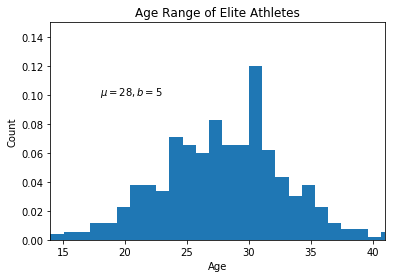

In [34]:
# Create a plot to show the range of the age of the elite athletes
count, bins, ignored = plt.hist(age, 30, density=True)   # Create Histogram with 30 bins
plt.title("Age Range of Elite Athletes")                 # Title
plt.xlabel("Age")                                        # X-axis Age
plt.ylabel("Count")                                      # Y-axis Count
plt.text(18, .1, r'$\mu=28, b=5$')                       # Input mean and std on histogram
plt.axis([14, 41, 0, .15])                               # Text on this axis
plt.show()

After plotting our the random data that we created, we can see that our age range goes from 15 to 41. This seems like a realistic age range depending on the athletes discipline. 

The oldest Olympic marathon winner was the 38-year-old Romanian athlete Constantina Dita Tomescu, competing at the Beijing Olympic Games. While Dara Torres, at the age of 41 in 2008, is the oldest swimmer to compete in the history of the Olympics, missing the gold medal in the 50-meter freestyle by hundredths of a second. [[Conv]](https://theconversation.com/how-does-aging-affect-athletic-performance-36051)

The youngest athlete currently registered for the 2018 PyeongChang Olympics is Wu Meng, a 15 year-old Chinese halfpipe skier. But she’s not the only 15 year-old competing in the Olympics this year. In fact there are five other 15-year-old Olympians this year, according to NBC Sports, and four 16-year-olds. The youngest member of Team USA this year is 17-year-old men’s figure skater Vincent Zhou.[[Time]](http://time.com/5154982/age-requirement-olympics-2018/)

#### Hours Trained

The next factor the has a negative impact on the performance is where a athletes over or under train. The optimal training will depend on the athletes discipline but the average hours trained is 6 hours per day.

Where an athlete overtrains this is know as the overtraining syndrome. This is clearly an issue for athletes and coaches at elite level. This is defined as an undesirable training outcome with negative performance development as an end result, potentially being a factor contributing to athlete burnout (Kenttä & Hassmèn, 1998). [[Believe]](https://believeperform.com/performance/overtraining-how-to-prevent-it/). 

Athletes will often ignore fatigue, heavy muscles, and depression until performance is chronically affected. Sleep disturbance occurs in over 90% of cases with difficulty in getting to sleep, nightmares, waking in the night, and waking unrefreshed. There may also be loss of appetite, weight loss, loss of competitive drive and libido, and increased emotional ability, anxiety, and irritability. The athlete may report a raised resting pulse rate and excessive sweating. [[Richard]]( https://bjsm.bmj.com/content/bjsports/32/2/107.full.pdf)

There are many reasons for undertraining – more skilled athletes usually undertrain due to lack of confidence and anxiety around fear of not winning and winning. However, motivation is a top reason for less skilled athletes who undertrain.[[DR]]( https://drmichellecleere.com/blog/undertraining-and-overtraining/)

Let's create a randomly set of data points for 150 athletes. For training hours, we use use a uniform distribution.

In [35]:
#Randomly generate hours per day between 3 and 10 for a 150 data points

# Fixing random seed for reproducibility
np.random.seed(64)

# Use Random uniform to generate hours between 3 and 10
train = np.random.uniform(3,10,500).round()
train

array([  6.,   7.,   7.,   6.,   6.,   5.,   5.,   5.,   7.,   6.,   8.,
         7.,   7.,   4.,   3.,   4.,   3.,   7.,   5.,   6.,   7.,   3.,
         3.,   6.,   5.,   6.,   9.,   5.,   7.,   5.,   4.,   4.,   9.,
         8.,   6.,   3.,   5.,   5.,   6.,   6.,   7.,   7.,   7.,   5.,
         4.,   5.,  10.,  10.,   8.,   8.,   4.,   9.,   7.,   4.,   9.,
         7.,   8.,   5.,  10.,   5.,   5.,   4.,   7.,   7.,   6.,   9.,
         6.,   9.,   3.,   9.,   5.,   6.,   5.,   8.,   4.,   4.,   5.,
         3.,  10.,   3.,   7.,   8.,  10.,   8.,   5.,   4.,   6.,   5.,
         7.,   5.,   5.,  10.,   9.,  10.,   4.,   6.,   9.,   6.,   9.,
         3.,   7.,   4.,   7.,   3.,   8.,   7.,   3.,   3.,   9.,   6.,
         3.,   3.,   9.,  10.,   7.,   4.,   6.,   6.,   4.,   5.,   5.,
         5.,   6.,   8.,   9.,   7.,   8.,   3.,   5.,   8.,   7.,   6.,
         3.,   5.,   4.,   8.,   4.,   9.,   8.,   5.,   4.,   9.,   9.,
         6.,   7.,   6.,   4.,   9.,   7.,   4.,   

In [36]:
# Count the training hours for each range
print("Summary of Hours by Athletes")
a = numpy.array([  6.,   7.,   7.,   6.,   6.,   5.,   5.,   5.,   7.,   6.,   8.,
         7.,   7.,   4.,   3.,   4.,   3.,   7.,   5.,   6.,   7.,   3.,
         3.,   6.,   5.,   6.,   9.,   5.,   7.,   5.,   4.,   4.,   9.,
         8.,   6.,   3.,   5.,   5.,   6.,   6.,   7.,   7.,   7.,   5.,
         4.,   5.,  10.,  10.,   8.,   8.,   4.,   9.,   7.,   4.,   9.,
         7.,   8.,   5.,  10.,   5.,   5.,   4.,   7.,   7.,   6.,   9.,
         6.,   9.,   3.,   9.,   5.,   6.,   5.,   8.,   4.,   4.,   5.,
         3.,  10.,   3.,   7.,   8.,  10.,   8.,   5.,   4.,   6.,   5.,
         7.,   5.,   5.,  10.,   9.,  10.,   4.,   6.,   9.,   6.,   9.,
         3.,   7.,   4.,   7.,   3.,   8.,   7.,   3.,   3.,   9.,   6.,
         3.,   3.,   9.,  10.,   7.,   4.,   6.,   6.,   4.,   5.,   5.,
         5.,   6.,   8.,   9.,   7.,   8.,   3.,   5.,   8.,   7.,   6.,
         3.,   5.,   4.,   8.,   4.,   9.,   8.,   5.,   4.,   9.,   9.,
         6.,   7.,   6.,   4.,   9.,   7.,   4.,   7.,   8.,   6.,   4.,
         3.,   6.,   4.,   6.,   8.,   5.,   7.,   5.,   5.,   8.,   5.,
         6.,   9.,   5.,   7.,   8.,   4.,   7.,   5.,   5.,  10.,   6.,
         4.,   3.,   6.,  10.,   7.,   8.,   7.,   4.,   6.,   6.,   5.,
         9.,   5.,   4.,   6.,   6.,   8.,   8.,   6.,  10.,   3.,   8.,
        10.,   5.,   8.,   4.,   6.,   7.,   7.,   6.,   6.,   6.,   7.,
         9.,   3.,   4.,   3.,   7.,  10.,   8.,   6.,   4.,   6.,   3.,
         6.,   3.,   9.,   5.,   8.,   8.,   9.,   9.,   9.,   4.,   6.,
         3.,   4.,   6.,   4.,   6.,   9.,   4.,   6.,   6.,   7.,   5.,
         6.,   6.,  10.,   9.,   8.,   5.,   9.,   7.,   8.,   9.,   5.,
         8.,   7.,   8.,   8.,   5.,   8.,   8.,   5.,   4.,   6.,   5.,
         7.,   6.,   3.,   9.,   8.,   8.,   4.,   8.,   4.,   9.,   9.,
         3.,   6.,   4.,   9.,   9.,   6.,   8.,   3.,   9.,   5.,   8.,
         8.,   7.,   6.,   8.,   7.,   7.,   4.,   6.,   6.,   5.,   8.,
         6.,   4.,   7.,   5.,   5.,   3.,   7.,   9.,   3.,   7.,   6.,
         6.,  10.,   8.,   9.,   3.,   8.,   7.,   7.,   7.,   6.,   9.,
         4.,   8.,   8.,   4.,   5.,  10.,   9.,   6.,   3.,   7.,   9.,
         4.,   3.,   8.,  10.,   4.,   8.,   9.,   9.,   4.,   8.,   4.,
         3.,   9.,   3.,   5.,   5.,   7.,   5.,   5.,   8.,   5.,   5.,
         7.,   8.,   6.,   7.,   3.,   5.,   7.,   7.,   5.,   8.,   5.,
         9.,   8.,   4.,   8.,   9.,   8.,   3.,   6.,   4.,   9.,   6.,
         6.,   6.,   7.,   6.,   8.,   5.,   7.,   8.,   7.,   6.,   4.,
         4.,   6.,   7.,   9.,   5.,   6.,   9.,   7.,   8.,   6.,   4.,
         7.,   5.,   5.,  10.,  10.,   5.,   9.,   6.,   4.,   9.,   4.,
         9.,   5.,   4.,   5.,   4.,   6.,   4.,   4.,   5.,   7.,   3.,
         6.,   6.,   5.,   7.,   7.,  10.,   4.,   8.,   7.,   8.,   4.,
         9.,   8.,   9.,   4.,   8.,   8.,   7.,   7.,   3.,   8.,   8.,
         9.,   4.,   7.,   8.,   9.,   8.,   8.,   7.,   4.,   4.,   6.,
         5.,   5.,   7.,   5.,   8.,   3.,  10.,   9.,   6.,   7.,   3.,
         7.,   9.,   4.,   9.,   9.,   9.,   3.,   7.,   7.,   5.,   6.,
         8.,   5.,   6.,   8.,   6.,   8.,   4.,   3.,   7.,   8.,   5.,
         7.,   4.,   9.,   7.,   9.,   8.,   4.,   8.,   4.,   3.,   8.,
         5.,   7.,   6.,  10.,   6.])
collections.Counter(a)

Summary of Hours by Athletes


Counter({3.0: 43,
         4.0: 67,
         5.0: 74,
         6.0: 81,
         7.0: 77,
         8.0: 75,
         9.0: 61,
         10.0: 22})

In [37]:
# The mean of training hours
np.mean(train).round()

6.0

In [38]:
# The standard deviation of training hours
np.std(train).round()

2.0

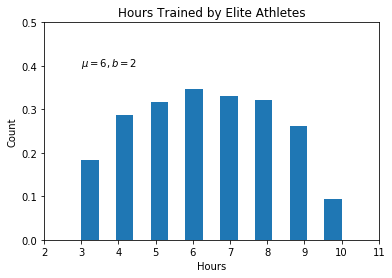

In [44]:
# Create a histogram to show our randomly generated hours
count, bins, ignored = plt.hist(train, 15, density=True) # Histogram with 30 bins
plt.title("Hours Trained by Elite Athletes")             # Title
plt.xlabel("Hours")                                      # X-axis Hours
plt.ylabel("Count")                                      # Y-axis Count
plt.text(3, .4, r'$\mu=6, b=2$')                         # Input mean and std on histogram
plt.axis([2, 11, 0, .5])                                 # Input text on these axis
plt.show()

The uniform distribution is used as athletes in a given day could train any amount of hours between 3 and 10. From the data provided the average optimal level of hours is 6 with anything below this athletes may be undertraining while any hours above this could lead to ovetraining. 

#### Recovery

An adequate balance between training and recovery is essential for athletes to achieve continuous high-level performance.  A systematic monitoring of recovery and the subsequent implementation of recovery routines aims at maximizing performance and preventing negative developments such as underrecovery, nonfunctional overreaching, the overtraining syndrome, injuries, or illnesses. [[NCBI]]( https://www.ncbi.nlm.nih.gov/pubmed/29345524)

Many athletes complain that the ability to recover from hard bouts of exercise diminishes. In many contact sports, such as professional American football or rugby, recovering from injuries and the cumulative effects of hard hits becomes the limiting factor in continuing to play at the highest level.[[Mashable]]( https://mashable.com/2015/07/07/aging-athletic-performance/?europe=true#YZXRDfVzwaqZ)

Building recovery time into any training program is important because this is the time that the body adapts to the stress of exercise and the real training effect takes place. Recovery also allows the body to replenish energy stores and repair damaged tissues. Recovery time allows these stores to be replenished and allows tissue repair to occur. Without sufficient time to repair and replenish, the body will continue to breakdown from intensive exercise. [[Well]]( https://www.verywellfit.com/the-benefits-of-rest-and-recovery-after-exercise-3120575)

There are a number of popular methods used by athletes to enhance recovery. Their use will depend on the type of activity performed, the time until the next training session or event and equipment and/or personnel available. Some of the most popular recovery techniques for athletes include hydrotherapy, active recovery, stretching, compression garments, massage, sleep and nutrition. [[GSS]]( https://www.gssiweb.org/sports-science-exchange/article/sse-120-recovery-techniques-for-athletes)

In relation to sleep recovery, studies show that an appropriate amount of sleep can improve speed, accuracy, and reaction time in athletes. For an ordianary person, the average amount of sleep is 8 hours. Athletes would need more and there average amount of sleep is closer to 9 hours per day.

We use the normal distribution with a mean of 8 and standard deviation of 2 based on studies. This will gives us an appropriate range of recovery with the majority of recovery hours sitting around the mean of 8.

In [47]:
# Fixing random seed for reproducibility
np.random.seed(64)

# Find the hours of recovery for 500 atheletes based on mean of 8 and std of 2
rec = (np.random.normal(8, 2, size=500)).round()
rec

array([ 10.,   4.,   6.,  12.,   4.,   7.,   6.,   6.,   3.,   9.,   9.,
        12.,   6.,   9.,   8.,   8.,   7.,   5.,   8.,   7.,   7.,   5.,
         7.,   9.,   5.,   9.,   7.,   7.,   9.,   9.,   8.,   8.,   5.,
         6.,   4.,   5.,  12.,  11.,   5.,   9.,   7.,   7.,  10.,  10.,
         6.,   8.,   8.,  11.,   6.,  10.,   7.,   8.,   9.,  13.,  10.,
         8.,  10.,   8.,   7.,   4.,  10.,   5.,  11.,  10.,   8.,   9.,
         7.,   7.,   4.,   7.,   4.,   9.,   8.,   6.,   8.,  10.,   7.,
         8.,   7.,   8.,   8.,  11.,   7.,  10.,   6.,   8.,   5.,   2.,
         7.,   7.,   6.,   6.,  11.,   6.,   9.,  10.,  11.,   6.,   5.,
        11.,   8.,   7.,   9.,   6.,   9.,   7.,   6.,  10.,   7.,  10.,
         3.,  12.,   7.,   8.,  11.,  10.,   6.,   7.,   7.,   6.,   6.,
        10.,   4.,   8.,  10.,   6.,   7.,   5.,   8.,   9.,  11.,   8.,
         9.,   6.,   6.,   6.,   8.,   9.,  11.,   9.,   6.,   8.,   4.,
         6.,   8.,   8.,   7.,   7.,   2.,   7.,  1

Text(0.5,0,'Accumulated Hours')

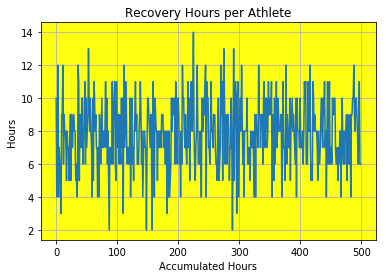

In [48]:
# Create a plot for athletes recovery hours
plt.plot(rec)                            # Plot recovery hours
ax = plt.gca()                           # Create background colour
ax.set_facecolor('xkcd:yellow')          # Colour yelloe background
plt.grid(True)                           # Grid back drop
plt.title("Recovery Hours per Athlete")  # Title
plt.ylabel("Hours")                      # X-axis Hours
plt.xlabel("Accumulated Hours")          # Y-axis Accumulated hours

The plot shows the recovery hours between 3 and 12 on the x-axis and the athletes on the y-axis. 

#### Calories

Most people have heard the general recommendation that adults eat about 2,000 calories per day. For athletes, however, that may not be enough. As people who ask a lot of their bodies, athletes need extra calories to fuel their activities and to encourage muscles and bones to continue strengthening. [[Calories]]( https://healthyeating.sfgate.com/caloric-needs-athletes-7179.html)

Each athlete will need to consume enough calories in order to perform at their best depending on their discipline but overall the average for an elite athletes is over 3000 calories per day. Eating the right amount of food at the right times is important for athletes because it helps build and fuel muscles. Carbohydrates and fat help fuel performance, while protein helps build muscle. A lack of water can decrease the effectiveness of workouts and cause cramping during competition. Sports drinks help athletes not only stay hydrated during games, matches and races, but also restore depleted glycogen, sodium, potassium and other electrolytes. [[Healthy]]( https://healthyliving.azcentral.com/list-factors-influencing-athletic-performance-4356.html)

As we can see from the chart below, depending on the athletes discipline will dictate how much calories they will need per day but on average calorie intake by all athletes is 4,000 and we will use normal distribution as with education and resources available to athletes you expect the majority of calories to be located around the mean. 

<img src="Calories.jpg" />

In [50]:
# Fixing random seed for reproducibility
np.random.seed(64)

# Create a random amount of calories for each athlete using random.normal
cal = np.random.normal(4000,1000,size=500).round()
cal

array([ 5100.,  2017.,  2850.,  6193.,  2099.,  3566.,  2864.,  2967.,
        1628.,  4703.,  4385.,  5750.,  2805.,  4295.,  4048.,  3829.,
        3495.,  2631.,  3897.,  3613.,  3544.,  2641.,  3603.,  4595.,
        2622.,  4512.,  3459.,  3509.,  4326.,  4739.,  3870.,  3966.,
        2650.,  2974.,  2124.,  2642.,  5857.,  5705.,  2629.,  4675.,
        3625.,  3458.,  4970.,  4767.,  3074.,  4087.,  4131.,  5358.,
        2936.,  5234.,  3650.,  3776.,  4382.,  6405.,  5208.,  3878.,
        5181.,  3793.,  3263.,  2143.,  4814.,  2719.,  5635.,  4977.,
        4127.,  4268.,  3316.,  3701.,  2079.,  3725.,  2079.,  4648.,
        3920.,  3184.,  3937.,  5108.,  3274.,  4176.,  3374.,  4061.,
        4022.,  5713.,  3574.,  5119.,  2761.,  4096.,  2448.,   959.,
        3574.,  3460.,  2918.,  3056.,  5567.,  3222.,  4436.,  5066.,
        5273.,  3127.,  2600.,  5477.,  3817.,  3507.,  4499.,  3238.,
        4339.,  3676.,  3148.,  5206.,  3622.,  5045.,  1619.,  5811.,
      

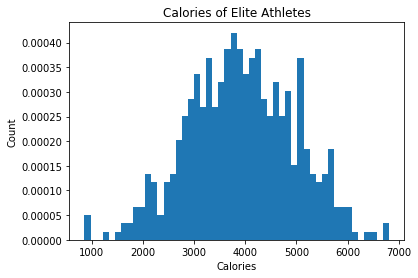

In [51]:
# Create a histogram to show our randomly generated calories
count, bins, ignored = plt.hist(cal, 50, density=True)   # histogram with 50 bins
plt.title("Calories of Elite Athletes")                  # Titles
plt.xlabel("Calories")                                   # X-axis Calories
plt.ylabel("Count")                                      # Y-axis Count
plt.show()

From our histogram, we can see that the calories count is between 1,000 and 6,500 and as stated earlier the mean is 4,000 with the majority of the athletes sitting around this amount of calories

#### Alcohol

Another variable that influences athlete’s performance is whether they drink alcohol or not. Alcohol can affect endurance, reaction time, dehydration and recovery. 

In relation to endurance. - the blood sugar your body needs for energy is produced by the liver when it releases glucose into the blood stream. Drinking alcohol in the 48-hour period before competing or training reduces your body’s ability to produce this sugar, so you have less energy and less endurance capacity. Alcohol also impair the absorption of nutrients such as zinc (energy metabolism), vitamins B1 and B12 (healthy blood, oxygen transport). Alcohol can affect the production of adenosine triphosphate (ATP), which is your muscles' source of energy. [[Ask]](http://www.askaboutalcohol./health/sports-performance/)

Reaction time - Alcohol is a sedative and it can affect your sports performance for up to 72 hours after you have finished drinking. Some team-game players think they have less tension and increased relaxation as a result of alcohol. The actual result, however, is poorer hand-eye coordination and slower responses. [[Ask]](http://www.askaboutalcohol./health/sports-performance/)

Recovery - Alcohol’s effect on sleep can reduce the amount of human growth hormone (HGH) in your body. HGH is part of normal muscle building and repair processes. Alcohol can also reduce testosterone, which is needed for muscle development and recovery.
[[Ask]](http://www.askaboutalcohol./health/sports-performance/)

Dehydration- Alcohol promotes water loss. It reduces the production of the anti-diuretic hormone, causing you to urinate more. This, in turn leads to dehydration. [[Ask]]( http://www.askaboutalcohol.ie/health/sports-performance/)


In [52]:
# Fixing random state for reproducibility
np.random.seed(64)

# Create a random choice whether atheletes drink or not
alco = np.random.choice(["No", "Yes"], size=500)
alco

array(['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'N

In [15]:
# The amount of Athletes
len(alco)

150

In [53]:
# Count the choice of Yes and No
print("Summary of Whether Athletes Drink or not")
b = numpy.array(['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'])
collections.Counter(b)

Summary of Whether Athletes Drink or not


Counter({'No': 269, 'Yes': 231})

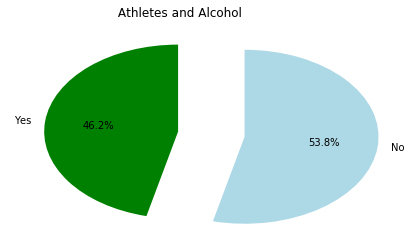

In [55]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Yes', 'No'                 # Yes and No labels
sizes = [231, 269]                     # Randomly generated choice of Yes and No
colours = ['green', 'lightblue']     # Colours of Yes and No
explode = (0, 0.5)                   # Space between Yes and No

plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct='%1.1f%%', shadow=False, startangle=90)
 
plt.title(' Athletes and Alcohol')   # Title
plt.show()

From our data created, we can see that only 43% of athletes drink alcohol.

## Age vs Recovery

There has been a lot of research about whether the older an athlete becomes the longer it takes to recover. Some research has indicated the age is not a factor in recovery while others think the opposite. The most comprehensive research I found indicates that older athletes do take longer to recovery, but this is more to do master athletes rather than professional athletes, so these factors have no relevance to this research as we are creating data for elite athletes up to their early 40’s. From these studies undertaken by Master Athletes in Australia, they have concluded that regular training into later life by master’s athletes does not appear to offset the age-related impairments in muscle protein metabolism. We also conclude that higher protein feedings may be beneficial to recovery for subsequent training or competition performance in master’s athletes. [[Master]]( http://www.mastersathlete.com.au/2017/03/weve-proved-it-older-athletes-do-take-longer-to-recover/)

## Training Hours vs Recovery Hours

The next factor's we will look at is the training and recovery hours.

In [56]:
# Create a data set for training and recovery hours using panda dataframe
hours = pd.DataFrame(data={'Train': train,  'Recovery': rec}) # Create dataset
hours = hours[['Train', 'Recovery']]                          # Rearrange Columns
hours.head()                                                  # Top 5 lines of dataset

,Train,Recovery
0,6.0,10.0
1,7.0,4.0
2,7.0,6.0
3,6.0,12.0
4,6.0,4.0


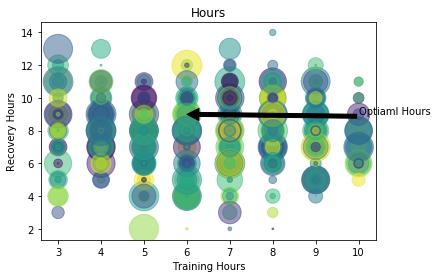

In [57]:
# Create a scatter plot showing recovery hours vs trained hours
x = train
y = rec
colours = np.random.rand(500)                              # Randomly generated colours
area = (30 * np.random.rand(500))**2                       # 0 to 15 point radii 

plt.scatter(x, y, s=area, c=colours, alpha=0.5)            # Create scatter plot
plt.annotate('Optiaml Hours', xy=(6, 9), xytext=(10, 9),   # Create point on scatter plot
             arrowprops=dict(facecolor='black', shrink=1.05),
             )
plt.title("Hours")                                          # Title
plt.xlabel("Training Hours")                                # X-axis Training Hours
plt.ylabel("Recovery Hours")                                # Y-axis Recovery Hours
plt.show()

The point highlighted in the above scatter plot is the optimal hours that athletes should train versus recovery based on the evidence collected. Any point outside these hours leads to a risk of under performing by that athlete.

## Training and Calories

 We will now look at the relationship between training hours and Calories an athlete should intake on a given day.

In [20]:
# # Create a data set for training hours and calories using panda dataframe
food = pd.DataFrame(data={'Train': train, 'Calories': cal})  # Create dataframe 
food = food[['Train', 'Calories']]                           # Rearrange Columns
food.tail()                                                  # Bottom 5 lines of dataset

,Train,Calories
145,6.0,3861.0
146,4.0,3293.0
147,9.0,3569.0
148,7.0,952.0
149,4.0,3534.0


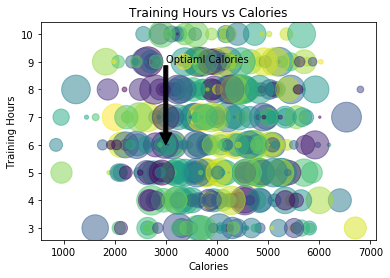

In [58]:
# Create a scatter plot showing recovery hours vs calories
x = cal
y = train

colours = np.random.rand(500)                               # Randomly generate colours for 150 atheletes
area = (30 * np.random.rand(500))**2                        # 0 to 15 point radii


plt.scatter(x, y, s=area, c=colours, alpha=0.5)             # Create scatter plot
plt.annotate('Optiaml Calories', xy=(3000, 6), xytext=(3000, 9),
             arrowprops=dict(facecolor='black', shrink=1.05),
             )
plt.title("Training Hours vs Calories")                     # Title
plt.xlabel("Calories")                                      # X-axis Training Hours
plt.ylabel("Training Hours")                                # Y-axis Calories
plt.show()

The point highlighted in the above scatter plot is the optimal calories that athletes should train versus calories intake based on the evidence collected. Any calories outside these calories leads to a risk of under performing by that athlete.

## Recovery vs Alcohol

Of particular relevance to the recovery of strength athletes is the enhanced protein synthesis that occurs post-exercise to facilitate repair and adaptive hypertrophy. Acute alcohol ingestion decreases muscle protein synthesis in a dose- and time-dependent manner, in the absence of an exercise stimulus. Alcohol facilitates this firstly by suppressing the phosphorylation and activation of the mTOR pathways, the critical kinase cascade regulating translation initiation [[NCBI]]( https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3257708/#B54-nutrients-02-00781)

## Dataframe

In [59]:
# Create a Dataframe of all factors randomly created
df = pd.DataFrame(data={'Age': age, 'Train': train, 'Alcohol': alco, 'Calories': cal, 'Recovery': rec})
df = df[['Age', 'Train', 'Recovery', 'Alcohol', 'Calories']]                           # Rearrange Columns
df

,Age,Train,Recovery,Alcohol,Calories
0,26,6.0,10.0,No,5100.0
1,29,7.0,4.0,No,2017.0
2,27,7.0,6.0,Yes,2850.0
3,25,6.0,12.0,No,6193.0
4,28,6.0,4.0,No,2099.0
5,32,5.0,7.0,Yes,3566.0
6,29,5.0,6.0,No,2864.0
7,23,5.0,6.0,Yes,2967.0
8,30,7.0,3.0,Yes,1628.0
9,23,6.0,9.0,No,4703.0


## The Best Performing Athlete 

From the data that was randomly generated from our data set, we are going to find the best performing athlete based on the above factors starting with the age of the athlete and when they are hitting their peak at the age of 26. We will begin by filtered on this age.

In [75]:
# Filter data set by age of 26
filtered_data = df[(df.Age == 26)]
filtered_data

,Age,Train,Recovery,Alcohol,Calories
0,26,6.0,10.0,No,5100.0
14,26,3.0,8.0,Yes,4048.0
15,26,4.0,8.0,No,3829.0
51,26,9.0,8.0,Yes,3776.0
63,26,7.0,10.0,No,4977.0
84,26,5.0,6.0,No,2761.0
112,26,9.0,7.0,Yes,3301.0
113,26,10.0,8.0,Yes,4174.0
141,26,9.0,8.0,Yes,4194.0
143,26,6.0,6.0,No,3025.0


Next up, athletes should only train on average 6 hours per day based on our research and should rest for 9 hours of recovery time if training for 6 hours. But since we have no athletes that fall into this category we will take the nearest hours of 8 hours and 10 hours. Since these last 4 athletes don't drink either then we are left to analysis the calories of each athlete to find the best performing one.

In [73]:
# Filter data set by age of 26, training hours of 6 & recovery hours by greater than 8 hours
filtered_data = df[(df.Age == 26) & (df.Train == 6) & (df.Recovery >= 8)]
filtered_data

,Age,Train,Recovery,Alcohol,Calories
0,26,6.0,10.0,No,5100.0
218,26,6.0,10.0,No,5124.0
239,26,6.0,10.0,No,5077.0
472,26,6.0,8.0,No,4086.0


In [74]:
# Find athlete 472 by using iloc
df.iloc[472]

Age           26
Train          6
Recovery       8
Alcohol       No
Calories    4086
Name: 472, dtype: object

So, from all the data created, the athlete that should be performing the best is athlete 472. The athlete is at their peak at age 26. They train the recommended hours of 6 hours. They do not rest for the 9 hours recommended but they do rest for 8 hours per day and of the 4 athletes left athlete 472 is eating the recommended calories of 4000 calories per day based on training 6 hours per day.


## References

[1] http://theconversation.com/how-does-aging-affect-athletic-performance-36051

[2] https://www.joefrielsblog.com/2017/01/how-important-is-training-volume.html

[3] http://blog.isportsanalysis.com/what-sport-performance-analysis/

[4] http://www.askaboutalcohol.ie/health/sports-performance/

[5] https://believeperform.com/performance/overtraining-how-to-prevent-it/

[6] https://drmichellecleere.com/blog/undertraining-and-overtraining/

[7] https://www.voanews.com/a/professional-athletes-prepare-for-life-after-sports-118377659/163130.html

[8] https://healthyeating.sfgate.com/caloric-needs-athletes-7179.html

[9] https://www.npr.org/sections/thesalt/2012/07/24/157317262/how-many-calories-do-olympic-athletes-need-it-depends?t=1543683876145

[10] https://www.verywellfit.com/the-benefits-of-rest-and-recovery-after-exercise-3120575

[11] http://www.mastersathlete.com.au/2017/03/weve-proved-it-older-athletes-do-take-longer-to-recover/

[12] https://www.dataquest.io/blog/numpy-tutorial-python/

[13] https://greatist.com/fitness/over-hill-have-you-passed-peak-performance

[14] http://time.com/5154982/age-requirement-olympics-2018/

[15] "Fatigue and underperformance in athletes: the overtraining syndrome" by Richard Budgett (1998)

[16] https://theconversation.com/how-does-aging-affect-athletic-performance-36051

[17] https://www.ncbi.nlm.nih.gov/pubmed/29345524

[18] https://www.gssiweb.org/sports-science-exchange/article/sse-120-recovery-techniques-for-athletes

[19] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3257708/#B54-nutrients-02-00781